In [1]:
!pip install -Uqq fastai duckduckgo_search
!pip install timm

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')   #  burada neden itemgot mage") bır işleve ıhtıyac duyduk.

In [3]:
from fastdownload import download_url

from fastai.vision.all import *


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
searches = 'Simmental','Holstein','Hereford','Angus','Charolais','Limousin','Jersey','Brown Swiss'
path = Path('/kaggle/working/what_kind_of_cow')
from time import sleep  #    sleep her bır ıcın 10 sanıye bekletır.

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} cow photo'))
    sleep(10)  # Pause between searches to avoid over-loading server

Searching for 'Simmental cow photo'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Searching for 'Holstein cow photo'
Searching for 'Hereford cow photo'
Searching for 'Angus cow photo'
Searching for 'Charolais cow photo'
Searching for 'Limousin cow photo'
Searching for 'Jersey cow photo'
Searching for 'Brown Swiss cow photo'


In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

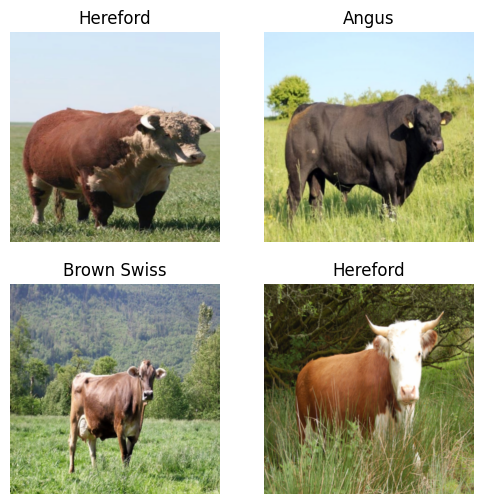

In [6]:
trn_path = Path('/kaggle/working/what_kind_of_cow')
dls = ImageDataLoaders.from_folder(
    trn_path, valid_pct=0.2, seed=42,
    item_tfms=[Resize(384, method='squish')],
    batch_tfms=aug_transforms(mult=0.1, do_flip=True),
    bs=4
)

dls.show_batch(max_n=25)


In [7]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 272MB/s]


SuggestedLRs(valley=0.0006918309954926372, slide=5.248074739938602e-05)

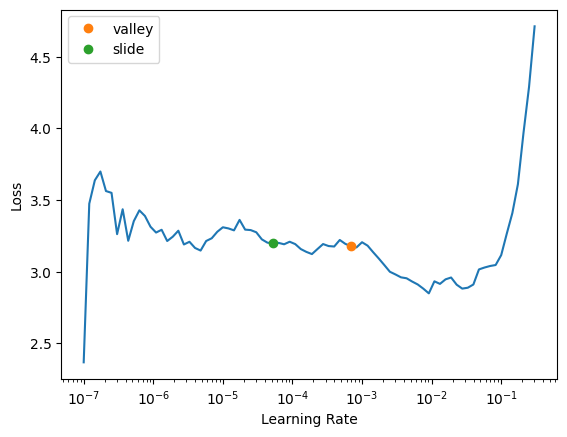

In [8]:
learn.lr_find(suggest_funcs=(valley,slide))

In [12]:
learn.fine_tune(15, 0.001) 

epoch,train_loss,valid_loss,error_rate,time
0,0.502338,0.851049,0.194245,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.335040,0.707184,0.151079,00:54
1,0.383006,0.626548,0.136691,00:53
2,0.467964,0.607588,0.151079,00:55
3,0.481612,0.780774,0.179856,00:55
4,0.297708,0.877990,0.172662,00:55
5,0.392715,0.699838,0.172662,00:53
6,0.342941,0.838695,0.187050,00:53
7,0.348350,0.677211,0.136691,00:54
8,0.349791,0.721572,0.151079,00:52
9,0.189817,0.731165,0.143885,00:38


In [ ]:
def classify_img(path):
    img = PILImage.create(path)
    pred,idx,probs = learn.predict(img)
    return dict(zip(dls.vocab, map(float,probs)))

classify_img('/kaggle/working/what_kind_of_cow/Angus/70b44c40-e9c3-4789-a0a9-2ce09340ee31.jpg')

In [ ]:
learn.export('model_cow.pkl')